# Cartopy Tutorial

This notebook is intended to be used with the Scripps Institution of Oceanography Software Carpentry Workshop in August of 2025. Tutorial will give a basic overview of Cartopy and many of its plotting features in Earth Sciences using the SWOT dataset

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a Python package used for geospatial data processing which can easily produce maps

In [70]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os


In [3]:
# Path to the NetCDF file
data_path = "/Users/tgstone/data/SIO_software_carpentries"
swot_file = "swot_l3_ssh_pass_013.nc"
path = os.path.join(data_path, swot_file)


# Open the dataset using xarray
ds = xr.open_dataset(path)

# Display data
ds

<xarray.Dataset> Size: 82MB
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 1777)
Coordinates:
    latitude              (num_lines, num_pixels) float64 5MB ...
    longitude             (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/18)
    time                  (num_lines) datetime64[ns] 79kB ...
    mdt                   (num_lines, num_pixels) float64 5MB ...
    ssha                  (num_lines, num_pixels) float64 5MB ...
    ssha_noiseless        (num_lines, num_pixels) float64 5MB ...
    ssha_unedited         (num_lines, num_pixels) float64 5MB ...
    quality_flag          (num_lines, num_pixels) int8 680kB ...
    ...                    ...
    ugosa                 (num_lines, num_pixels) float64 5MB ...
    vgosa                 (num_lines, num_pixels) float64 5MB ...
    sigma0                (num_lines, num_pixels) float64 5MB ...
    i_num_line            (num_nadir) int16 4kB ...
    i_num_pixel           (num_nadir) int8 2kB ...
    cross_track_distance  (num_pixels) float64 552B ...
Attributes: (12/42)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     https://aviso.altimetry.fr
    institution:                     CNES
    license:                         https://www.aviso.altimetry.fr/fileadmin...
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              144.614138
    geospatial_lon_max:              311.560107
    doi:                             10.24400/527896/a01-2023.018
    data_used:                       L2 SWOT (NASA/CNES). DOI associated : ht...

## Satellite Data with Mapping

For this exercise we will be looking at the Sea Surface Height Anomalies (SSHA) variable in the SWOT track 13 array. To do this we will

1) extract the varaibles from the dataset
2) plot the global path
3) Zoom in on an area along the California coast

In [4]:
lons = ds['longitude'].values
lats = ds['latitude'].values
ssha = ds['ssha'].values

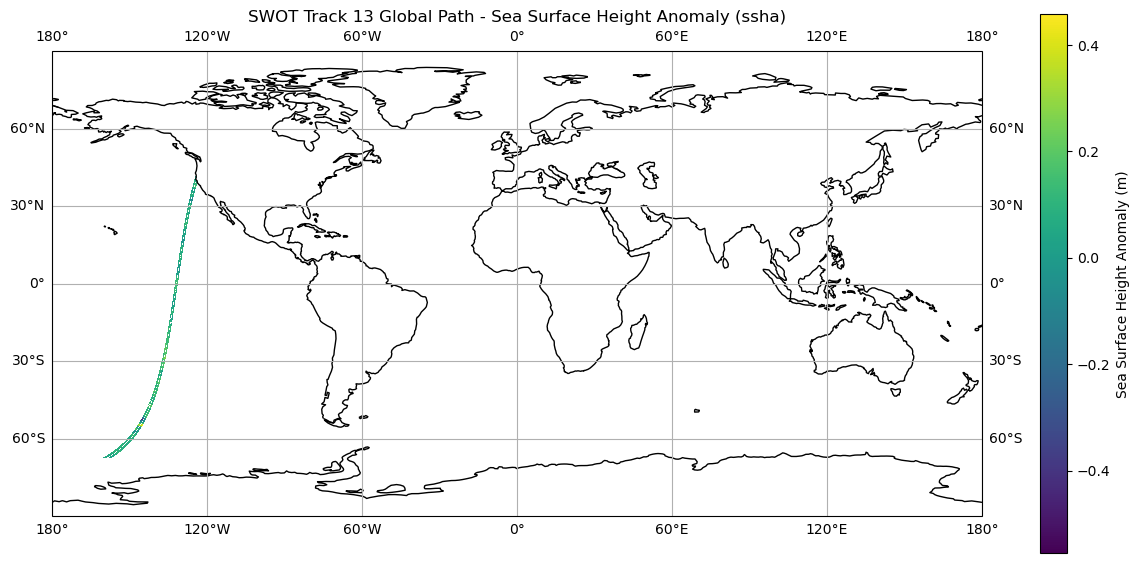

In [5]:
# Plot Horizontal Geostrophic Velocity (ugos)
plt.figure(figsize=(15, 7))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
cb1 = plt.pcolormesh(lons, lats, ssha, transform=ccrs.PlateCarree())
plt.colorbar(cb1, ax=ax1, orientation='vertical', label='Sea Surface Height Anomaly (m)')
#ax1.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
#ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('SWOT Track 13 Global Path - Sea Surface Height Anomaly (ssha)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()




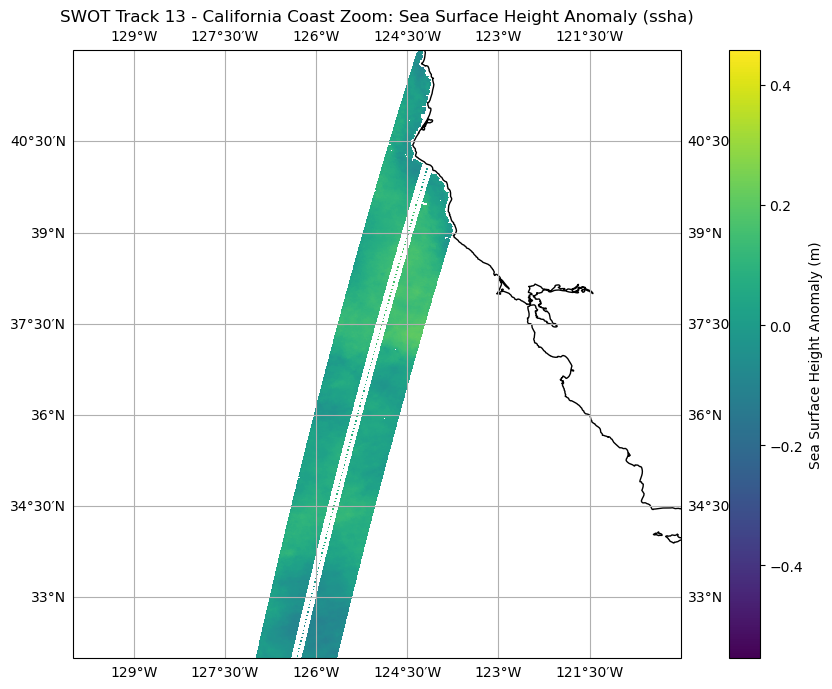

In [6]:
# Zoom in on a section
plt.figure(figsize=(10, 7))
ax_zoom = plt.axes(projection=ccrs.PlateCarree())
ax_zoom.set_extent([-130, -120, 32, 42], crs=ccrs.PlateCarree())
ax_zoom.coastlines()
cb_zoom = plt.pcolormesh(lons, lats, ssha, transform=ccrs.PlateCarree())
plt.colorbar(cb_zoom, ax=ax_zoom, orientation='vertical', label='Sea Surface Height Anomaly (m)')
ax_zoom.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.title('SWOT Track 13 - California Coast Zoom: Sea Surface Height Anomaly (ssha)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## Plotting TPOSE Temperature Data

In [7]:
## Plotting with TPOSE6

filename = "TPOSE6_Daily_2012_surface.nc"
path = os.path.join(data_path, filename)

tpose6 = xr.open_dataset(path)

times = tpose6['time']
THETA = tpose6['THETA'].squeeze() # potential temperature
SALT = tpose6['SALT'].squeeze() # salinity
U = tpose6['UVEL'].squeeze() # zonal velocity
V = tpose6['VVEL'].squeeze() # meridional velocity
lat = tpose6['YC']
lon = tpose6['XC']

ref_date = pd.Timestamp('2012-01-01')
times_dt = ref_date + times.values
times_dt[:5]  

/var/folders/1b/x5llpgf52k55svy01rj4vp1w0000gn/T/ipykernel_2765/2254830558.py:6: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  tpose6 = xr.open_dataset(path)


array(['2012-01-01T00:01:12.000000000', '2012-01-01T00:02:24.000000000',
       '2012-01-01T00:03:36.000000000', '2012-01-01T00:04:48.000000000',
       '2012-01-01T00:06:00.000000000'], dtype='datetime64[ns]')

In [8]:
tpose6

<xarray.Dataset> Size: 120MB
Dimensions:  (time: 366, Z: 1, YC: 84, XG: 241, YG: 85, XC: 240)
Coordinates: (12/26)
    iter     (time) int64 3kB ...
  * time     (time) timedelta64[ns] 3kB 00:01:12 00:02:24 ... 01:10:48 01:12:00
  * YC       (YC) float64 672B -3.917 -3.75 -3.583 -3.417 ... 9.583 9.75 9.917
  * XG       (XG) float64 2kB 210.0 210.2 210.3 210.5 ... 249.7 249.8 250.0
  * Z        (Z) float64 8B -1.0
    dyG      (YC, XG) float32 81kB ...
    ...       ...
    rA       (YC, XC) float32 81kB ...
    Depth    (YC, XC) float32 81kB ...
    hFacC    (Z, YC, XC) float32 81kB ...
    maskC    (Z, YC, XC) bool 20kB ...
    dxF      (YC, XC) float32 81kB ...
    dyF      (YC, XC) float32 81kB ...
Data variables:
    UVEL     (time, Z, YC, XG) float32 30MB ...
    VVEL     (time, Z, YG, XC) float32 30MB ...
    THETA    (time, Z, YC, XC) float32 30MB ...
    SALT     (time, Z, YC, XC) float32 30MB ...

Text(0.5, 0.95, 'TPOSE6 Daily Surface Temperature')

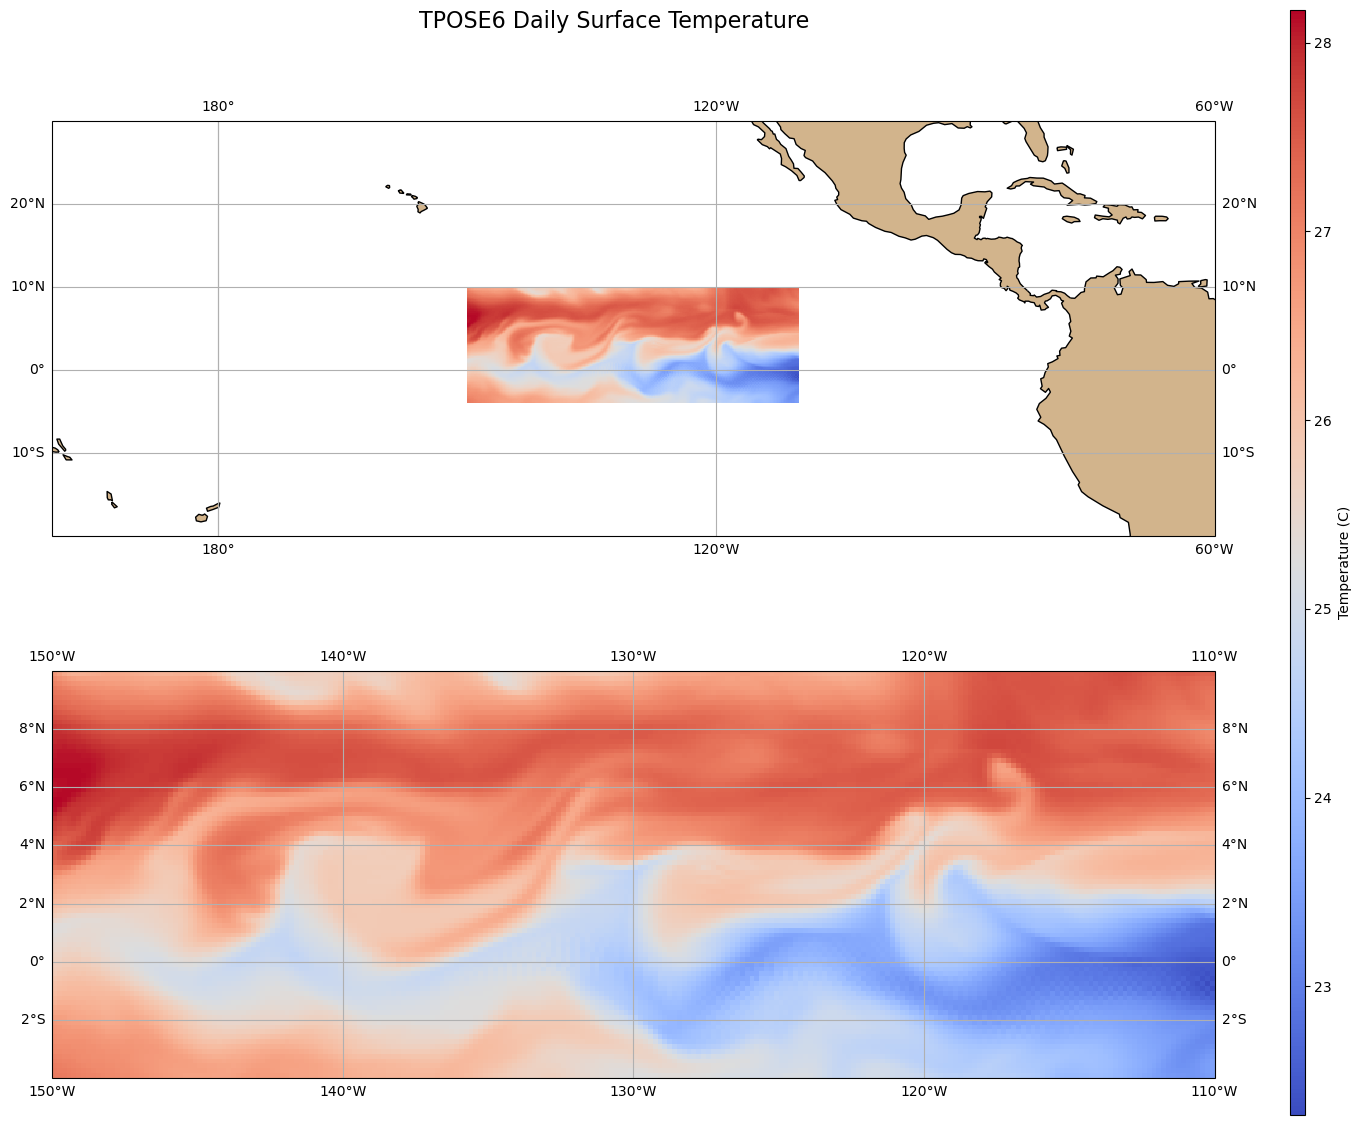

In [116]:
# create map temparture across pacific with wrapping around from 170 to -160
fig, axs =plt.subplots(figsize=(15, 13), nrows=2, ncols=1,
             subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})


# Extracting data
THETA1 = THETA[360,:,:]

# Plotting with boundaries
cb0 = axs[0].pcolormesh(lon, lat, THETA1, transform=ccrs.PlateCarree(central_longitude=0), cmap='coolwarm')
axs[0].set_extent([160, 300, -20, 30], crs=ccrs.PlateCarree(central_longitude=0))
axs[0].add_feature(cfeature.LAND, facecolor='tan')
axs[0].coastlines()
axs[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)


# Plotting in correct dimensions
cb1 = axs[1].pcolormesh(lon, lat, THETA1, transform=ccrs.PlateCarree(), cmap='coolwarm')
axs[1].coastlines()
axs[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Adding colorbar in far left location
cbar_ax = fig.add_axes([0.95, 0.1, 0.01, 0.85])  # [left, bottom, width, height]
cb = fig.colorbar(cb1, cax=cbar_ax, orientation='vertical', label='Temperature (C)')

plt.suptitle('TPOSE6 Daily Surface Temperature', fontsize=16, y = 0.95)


In [125]:
## Plotting Spray Glider Data
ds = xr.open_dataset("/Users/tgstone/data/SIO_software_carpentries/spray_glider_ctd.nc")
ds

<xarray.Dataset> Size: 212kB
Dimensions:      (depth: 50, time: 129, longitude: 129)
Coordinates:
  * depth        (depth) int32 200B 10 20 30 40 50 60 ... 460 470 480 490 500
  * time         (time) datetime64[ns] 1kB 2020-02-27T02:02:50 ... 2020-03-12...
  * longitude    (longitude) float64 1kB -120.6 -120.6 -120.6 ... -123.9 -123.9
Data variables:
    temperature  (depth, time) float64 52kB ...
    salinity     (depth, time) float64 52kB ...
    density      (depth, time) float64 52kB ...
    chlorophyll  (depth, time) float64 52kB ...
    latitude     (time) float64 1kB ...
    water_depth  (time) float64 1kB ...
    distance     (time) float64 1kB ...

In [131]:
t = ds['time']
lon = ds['longitude']
lat = ds['latitude']
d = ds['depth']
c = ds['chlorophyll']

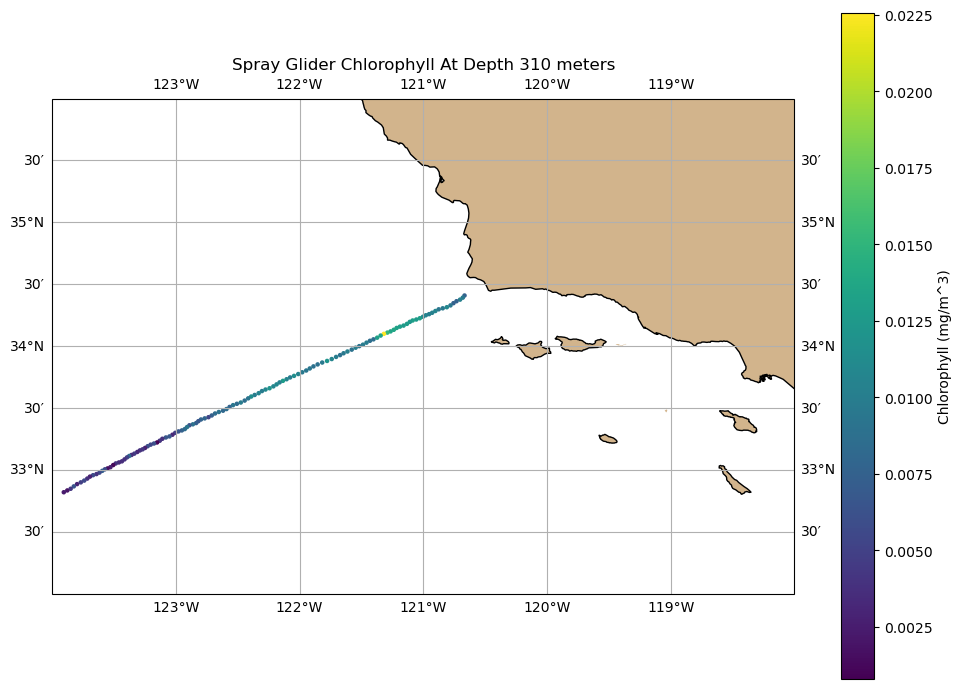

In [152]:
# index for depth
didx = 30

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-124, -118, 32, 36], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='tan')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Scatter plot with Cartopy
sc = ax.scatter(lon, lat, c=c[didx, :], cmap='viridis', s=5, transform=ccrs.PlateCarree())
plt.colorbar(sc, ax=ax, orientation='vertical', label='Chlorophyll (mg/m^3)')

plt.title('Spray Glider Chlorophyll At Depth {} meters'.format(d[didx].values))
plt.tight_layout()
plt.show()

In [140]:
d[0].values

array(10, dtype=int32)